In [149]:
import librosa
import soundfile
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import pandas as pd
import os 
import librosa
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

## Audio Classification and Data Preprocessing

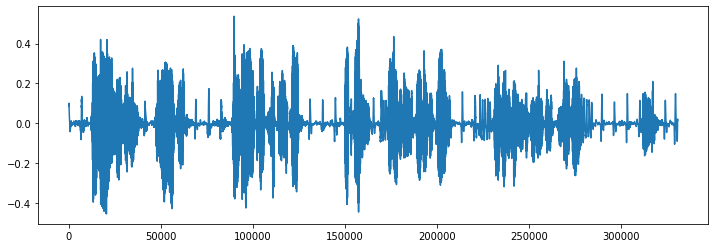

In [211]:
# reading one audio file
audio_path_file = 'audio_data/1688/audio_data_librispeech_test-other_1688_1688-142285-0000.flac'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_path_file)
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
wave_sample_rate, wave_audio = librosa.load(audio_path_file)

In [27]:
librosa_sample_rate

22050

## Feature Extraction

We will be extracting  Mel-Frequency Cepstral CoefficientS(MFCC) from audio samples. MFC helps to summarize the frequency distribution, providing us with the information of frequency and sound. Audio representations will help us to identify feature classification. 

In [214]:
# feature extraction of a single audio file
mfccs = librosa.feature.mfcc(y= librosa_audio_data,sr = librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 646)


In [34]:
mfccs

array([[-527.8346   , -523.5454   , -486.3004   , ..., -556.20386  ,
        -556.5793   , -520.57983  ],
       [  26.92537  ,   38.439144 ,   22.423164 , ...,   34.320568 ,
          33.73329  ,   80.398865 ],
       [  66.33332  ,   36.472206 ,  -10.679515 , ...,   34.01207  ,
          33.33093  ,   68.59997  ],
       ...,
       [   4.051616 ,    3.972033 ,    5.0279646, ...,    1.6732018,
           2.4228623,    2.0000699],
       [   1.6158984,   -2.4456491,   -8.29129  , ...,    1.5855259,
           2.3104856,    1.9141693],
       [   2.9098735,   -2.7131119,   -8.958284 , ...,    1.509596 ,
           2.312667 ,    1.8580772]], dtype=float32)

In [215]:

mfccs_scaled_features = []
feature_class= []
file_features = []
for file in glob.glob("audio_data\\*\\*.flac"):
    class_name = file.split('\\', 3)
    class_name = class_name[1]
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc= 40)
    scaled_features = np.mean(mfccs_features.T, axis=0)
    file_features.append([file, scaled_features,class_name])


## Converting extracted features and classes into Datafram

In [218]:
#Converting the extracted features from audio file in form of a dataframe
extracted_features_df = pd.DataFrame(file_features, columns=['filename','feature','class'])
extracted_features_df

,filename,feature,class
0,audio_data\1688\audio_data_librispeech_test-ot...,"[-391.26465, 82.90121, -4.3983636, 46.456425, ...",1688
1,audio_data\1688\audio_data_librispeech_test-ot...,"[-345.8269, 98.414375, -7.50277, 56.46835, -5....",1688
2,audio_data\1688\audio_data_librispeech_test-ot...,"[-366.1144, 88.73568, 4.7026033, 66.38582, 3.9...",1688
3,audio_data\1688\audio_data_librispeech_test-ot...,"[-345.7626, 103.29064, -17.151917, 51.8374, -7...",1688
4,audio_data\1688\audio_data_librispeech_test-ot...,"[-357.60776, 114.49925, 2.36592, 50.51694, 0.7...",1688
...,...,...,...
76,audio_data\533\audio_data_librispeech_test-oth...,"[-337.1115, 90.042564, -48.157505, 58.62846, -...",533
77,audio_data\533\audio_data_librispeech_test-oth...,"[-343.13162, 100.598915, -61.561226, 55.052746...",533
78,audio_data\533\audio_data_librispeech_test-oth...,"[-325.2925, 94.51821, -55.160786, 60.671467, -...",533
79,audio_data\533\audio_data_librispeech_test-oth...,"[-304.22592, 84.04434, -52.814323, 60.814087, ...",533


In [219]:
X = np.array(extracted_features_df['feature'].tolist())
y= np.array(extracted_features_df['class'].tolist())

In [220]:
X.shape

(81, 40)

In [221]:
y = np.array(pd.get_dummies(y))

In [222]:
y.shape

(81, 9)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [224]:
X_train

array([[-3.84091705e+02,  7.65455856e+01, -5.41322441e+01, ...,
        -2.33300495e+00,  3.56829017e-01, -1.71665478e+00],
       [-2.82949036e+02,  1.21148071e+02, -4.47051849e+01, ...,
        -2.17928934e+00, -1.82095921e+00, -1.65071011e+00],
       [-3.45762604e+02,  1.03290642e+02, -1.71519165e+01, ...,
         2.37156487e+00,  1.37797284e+00,  1.76133561e+00],
       ...,
       [-3.18711304e+02,  1.03402946e+02, -3.53993568e+01, ...,
         3.25968647e+00,  2.29970479e+00,  1.52823865e-01],
       [-2.95741638e+02,  1.10841454e+02, -3.78969498e+01, ...,
        -1.95834708e+00, -1.77555573e+00, -1.59292519e+00],
       [-2.85987732e+02,  1.23819145e+02, -3.45744209e+01, ...,
        -2.42503309e+00, -1.96301818e+00, -1.25051081e+00]], dtype=float32)

## Using hot encoding for label classification

In [115]:
y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0,

In [225]:
X_train.shape

(64, 40)

In [226]:
X_test.shape

(17, 40)

In [227]:
y_train.shape

(64, 9)

In [228]:
y_test.shape

(17, 9)

In [229]:
y.shape
num_labels = y.shape[1]

## Model Training - MLP Classifier

We carried out model training with MLP classifer and as compared to previous version where we were getting accuracy of around 60%, this time accuracy rate this is being achieved is 98% on train data and 94% on test data. 

In [230]:
#Initializing the Sequential Model
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
    
#build the network architecture
# In order to take care of overfitting model, we are using l2 regularization only and reducing epoch to 50. 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(40, )),
    
    #first hidden layer with l2 regularization 
    keras.layers.Dense(524, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
   
    
    #second hidden layer with L2 regularization 
    keras.layers.Dense(128, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
 
    #third hidden layer with l2 regularization
    keras.layers.Dense(64, activation= 'relu',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(9, activation='softmax')
])

In [201]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_25 (Dense)             (None, 524)               52924     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               67200     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 9)                 585       
Total params: 133,065
Trainable params: 133,065
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [204]:

num_epochs = 100
num_batch_size = 512

data = model.fit(X_train, y_train, batch_size= num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 217ms/step - loss: 0.2848 - accuracy: 0.9844 - val_loss: 0.4124 - val_accuracy: 0.9412
Epoch 2/100
1/1 [==============================] - 0s 99ms/step - loss: 0.2830 - accuracy: 0.9844 - val_loss: 0.4126 - val_accuracy: 0.9412
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 0.2830 - accuracy: 0.9844 - val_loss: 0.4143 - val_accuracy: 0.9412
Epoch 4/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2815 - accuracy: 0.9844 - val_loss: 0.4131 - val_accuracy: 0.9412
Epoch 5/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2815 - accuracy: 0.9844 - val_loss: 0.4011 - val_accuracy: 0.9412
Epoch 6/100
1/1 [==============================] - 0s 100ms/step - loss: 0.2802 - accuracy: 0.9844 - val_loss: 0.3926 - val_accuracy: 0.9412
Epoch 7/100
1/1 [==============================] - 0s 84ms/step - loss: 0.2798 - accuracy: 0.9844 - val_loss: 0.3937 - val_accuracy: 0.9412
Epoch 8/100
1/1 [

Epoch 59/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2618 - accuracy: 0.9844 - val_loss: 0.4173 - val_accuracy: 0.9412
Epoch 60/100
1/1 [==============================] - 0s 100ms/step - loss: 0.2619 - accuracy: 0.9844 - val_loss: 0.4087 - val_accuracy: 0.9412
Epoch 61/100
1/1 [==============================] - 0s 100ms/step - loss: 0.2622 - accuracy: 0.9844 - val_loss: 0.4219 - val_accuracy: 0.9412
Epoch 62/100
1/1 [==============================] - 0s 104ms/step - loss: 0.2616 - accuracy: 0.9844 - val_loss: 0.4205 - val_accuracy: 0.9412
Epoch 63/100
1/1 [==============================] - 0s 103ms/step - loss: 0.2611 - accuracy: 0.9844 - val_loss: 0.4205 - val_accuracy: 0.9412
Epoch 64/100
1/1 [==============================] - 0s 85ms/step - loss: 0.2612 - accuracy: 0.9844 - val_loss: 0.4291 - val_accuracy: 0.9412
Epoch 65/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2612 - accuracy: 0.9844 - val_loss: 0.4187 - val_accuracy: 0.9412
Epoch 66

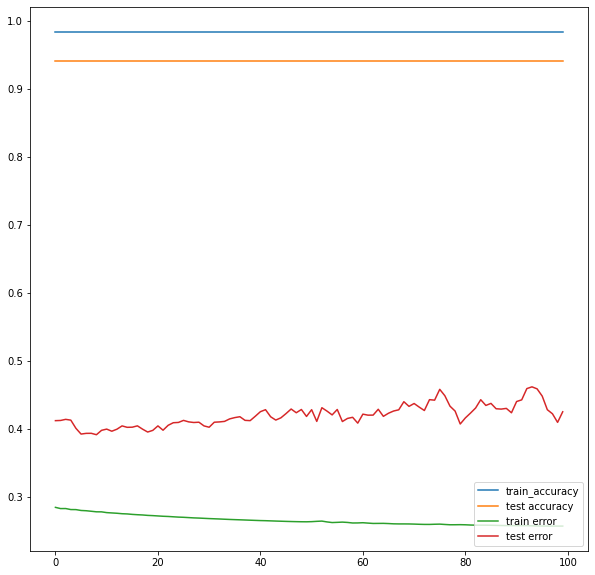

In [210]:
plt.figure(figsize=(10,10))

plt.plot(data.history["accuracy"], label="train_accuracy")
plt.plot(data.history["val_accuracy"], label= "test accuracy")
plt.legend(loc = "lower right")
plt.plot(data.history["loss"], label="train error")
plt.plot(data.history["val_loss"], label= "test error")
#plt.set_ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()
